In [ ]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [ ]:
ls

MyDrive/  Shareddrives/


In [ ]:
cd /gdrive/MyDrive/pizza

/gdrive/MyDrive/pizza


In [ ]:
ls

pizza_v1.csv  pizza_v2.csv


# Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier as rf
import warnings
warnings.filterwarnings("ignore")
import joblib

# Uploading Dataset

In [ ]:
df1=pd.read_csv('pizza_v2.csv')
df1.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [ ]:
df=pd.read_csv('pizza_v1.csv')
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   price_rupiah  129 non-null    object 
 2   diameter      129 non-null    float64
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.2+ KB


In [ ]:
df.describe()

,diameter
count,129.000000
mean,12.976744
std,3.272674
min,8.000000
25%,12.000000
50%,12.000000
75%,14.000000
max,22.000000


# EDA

In [ ]:
df.isna().sum()

company         0
price_rupiah    0
diameter        0
topping         0
variant         0
size            0
extra_sauce     0
extra_cheese    0
dtype: int64

In [ ]:
df.columns

Index(['company', 'price_rupiah', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese'],
      dtype='object')

In [ ]:
columns = df.columns
binary_cols = []

for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [ ]:
binary_cols

['extra_sauce', 'extra_cheese', 'extra_mushrooms']

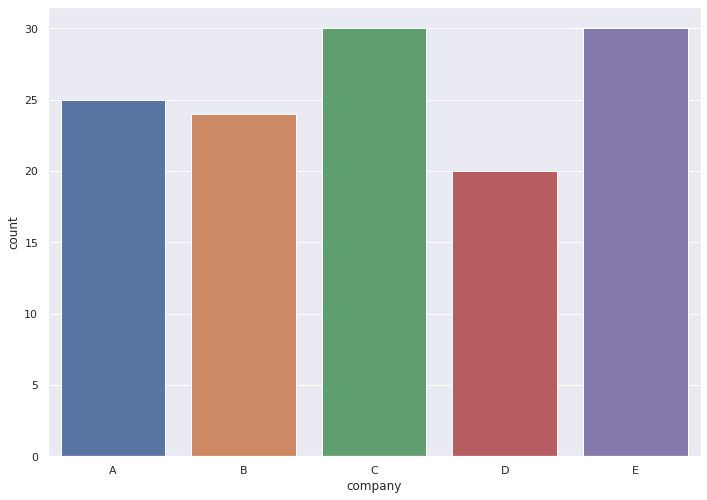

In [ ]:
sns.countplot("company", data=df)

In [ ]:
company_numeric = {'A':0, 'B':1, 'C':2,'D':3,'E':4}
df.company.replace(company_numeric, inplace=True)

In [ ]:
extra_sauce_numeric = {'yes':1, 'no':0}
df.extra_sauce.replace(extra_sauce_numeric, inplace=True)

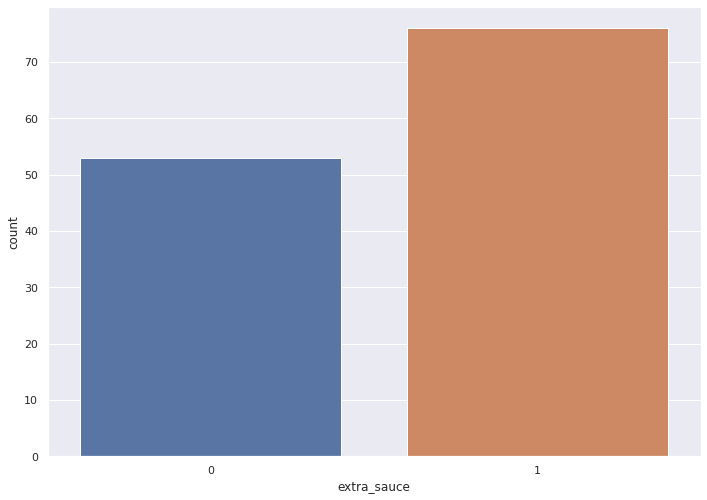

In [ ]:
sns.countplot("extra_sauce", data=df)

In [ ]:
extra_cheese_numeric = {'yes':1, 'no':0}
df.extra_cheese.replace(extra_cheese_numeric, inplace=True)

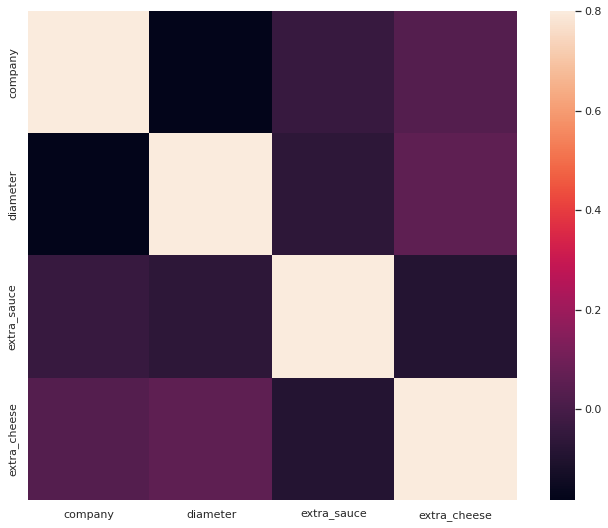

In [ ]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

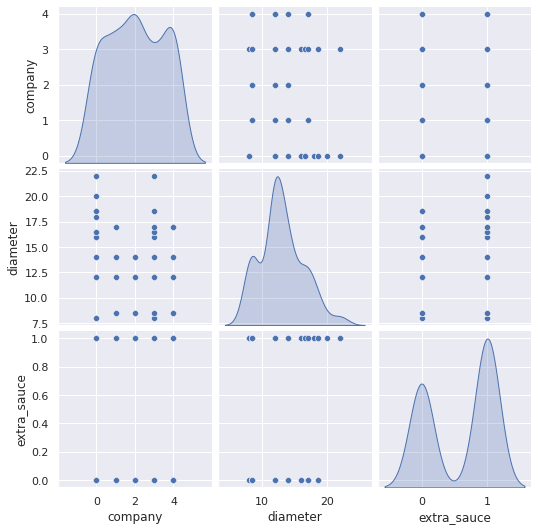

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   

In [ ]:
X = df.drop(['price_rupiah', 'topping', 'variant', 'size'], axis = 1)
Y = df["price_rupiah"]
x_Data = X.values
y_Data = Y.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_Data, y_Data, test_size = 0.2, random_state = 42)

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
model.score(X_test,y_test)

0.15384615384615385

In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(GaussianNB(),X_train, y_train, cv=5))

[0.28571429 0.33333333 0.23809524 0.2        0.15      ]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
pred = model.predict(X_train) 
accuracy_score(y_train, pred)

0.5631067961165048

In [ ]:
confusion_matrix(y_train, pred)

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 3, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]])

In [ ]:
predicted_test = model.predict(X_test)
p=accuracy_score(y_test, predicted_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [ ]:
print(classification_report(y_test, predicted_test))

              precision    recall  f1-score   support

   Rp110,000       0.00      0.00      0.00         2
   Rp114,000       0.00      0.00      0.00         0
   Rp120,000       0.00      0.00      0.00         0
   Rp123,000       0.00      0.00      0.00         1
   Rp126,500       0.00      0.00      0.00         0
   Rp140,000       1.00      1.00      1.00         1
    Rp23,500       0.00      0.00      0.00         1
   Rp230,000       0.00      0.00      0.00         1
   Rp248,000       0.00      0.00      0.00         1
    Rp28,000       0.00      0.00      0.00         0
    Rp31,000       0.00      0.00      0.00         2
    Rp39,000       0.00      0.00      0.00         2
    Rp44,000       0.00      0.00      0.00         1
    Rp46,000       0.00      0.00      0.00         2
    Rp54,000       0.00      0.00      0.00         0
    Rp69,000       0.00      0.00      0.00         0
    Rp70,000       0.00      0.00      0.00         1
    Rp72,000       0.50    

In [ ]:
cma = confusion_matrix(y_test, predicted_test)

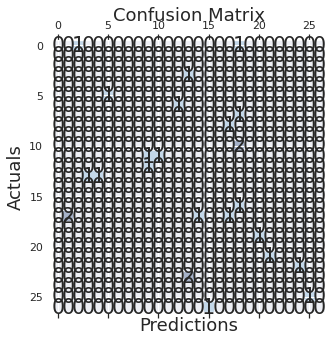

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Random forest Classifier

In [ ]:
clf_forest = rf(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.7087378640776699

In [ ]:
confusion_matrix(y_train, pred)

array([[0, 0, 0, ..., 0, 1, 1],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 0, 1, 2]])

In [ ]:
pred_test = clf_forest.predict(X_test)
q=accuracy_score(y_test, pred_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [ ]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

   Rp110,000       1.00      0.50      0.67         2
   Rp120,000       0.00      0.00      0.00         0
   Rp123,000       0.00      0.00      0.00         1
   Rp126,500       0.00      0.00      0.00         0
   Rp140,000       1.00      1.00      1.00         1
   Rp149,000       0.00      0.00      0.00         0
   Rp155,000       0.00      0.00      0.00         0
   Rp188,000       0.00      0.00      0.00         0
    Rp23,500       0.00      0.00      0.00         1
   Rp230,000       0.00      0.00      0.00         1
   Rp248,000       0.00      0.00      0.00         1
    Rp28,000       0.00      0.00      0.00         0
    Rp31,000       0.00      0.00      0.00         2
    Rp35,000       0.00      0.00      0.00         0
    Rp39,000       0.00      0.00      0.00         2
    Rp44,000       0.00      0.00      0.00         1
    Rp46,000       0.00      0.00      0.00         2
    Rp49,000       0.00    

In [ ]:
cma = confusion_matrix(y_test, pred_test)

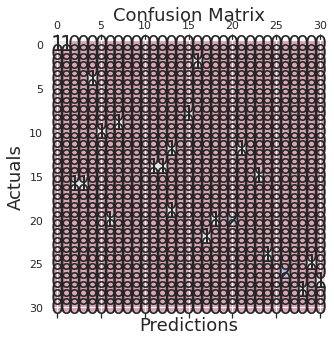

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Decision Tree Classifier

In [ ]:
from sklearn import tree

In [ ]:
 clf = tree.DecisionTreeClassifier()
 clf = clf.fit(X_train, y_train)

In [ ]:
pred1 = clf.predict(X_train)
accuracy_score(y_train, pred1)

0.7087378640776699

In [ ]:
confusion_matrix(y_train, pred1)

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [1, 0, 0, ..., 0, 2, 0],
       [1, 0, 0, ..., 0, 1, 1]])

In [ ]:
pred1_test = clf.predict(X_test)
r=accuracy_score(y_test, pred1_test)

In [ ]:
print(classification_report(y_test, pred1_test))

              precision    recall  f1-score   support

   Rp110,000       1.00      0.50      0.67         2
   Rp115,000       0.00      0.00      0.00         0
   Rp120,000       0.00      0.00      0.00         0
   Rp123,000       0.00      0.00      0.00         1
   Rp126,500       0.00      0.00      0.00         0
   Rp140,000       1.00      1.00      1.00         1
   Rp188,000       0.00      0.00      0.00         0
    Rp23,500       0.00      0.00      0.00         1
   Rp230,000       1.00      1.00      1.00         1
   Rp248,000       0.00      0.00      0.00         1
    Rp28,000       0.00      0.00      0.00         0
    Rp31,000       0.00      0.00      0.00         2
    Rp35,000       0.00      0.00      0.00         0
    Rp39,000       0.00      0.00      0.00         2
    Rp44,000       0.00      0.00      0.00         1
    Rp46,000       0.00      0.00      0.00         2
    Rp49,000       0.00      0.00      0.00         0
    Rp60,000       0.00    

In [ ]:
cma = confusion_matrix(y_test, pred1_test)

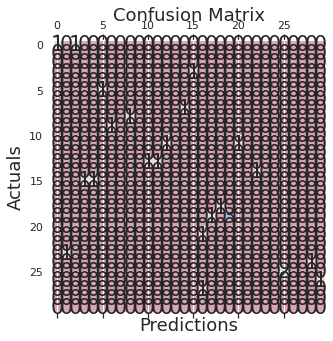

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression  
clf1= LogisticRegression(random_state=0)  
clf1.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [ ]:
pred_LR= clf1.predict(X_train)
accuracy_score(y_train, pred_LR)

0.32038834951456313

In [ ]:
confusion_matrix(y_train, pred_LR)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
pred_LR_test = clf1.predict(X_test)
s=accuracy_score(y_test, pred_LR_test)

In [ ]:
print(classification_report(y_test, pred_LR_test))

              precision    recall  f1-score   support

   Rp110,000       1.00      0.50      0.67         2
   Rp123,000       0.00      0.00      0.00         1
   Rp140,000       1.00      1.00      1.00         1
   Rp149,000       0.00      0.00      0.00         0
    Rp23,500       0.00      0.00      0.00         1
   Rp230,000       0.00      0.00      0.00         1
   Rp248,000       0.00      0.00      0.00         1
    Rp31,000       0.00      0.00      0.00         2
    Rp39,000       0.00      0.00      0.00         2
    Rp44,000       0.00      0.00      0.00         1
    Rp46,000       0.00      0.00      0.00         2
    Rp49,000       0.00      0.00      0.00         0
    Rp70,000       0.00      0.00      0.00         1
    Rp72,000       0.33      0.25      0.29         4
    Rp75,000       0.00      0.00      0.00         0
    Rp76,000       0.00      0.00      0.00         1
    Rp83,000       0.33      1.00      0.50         1
    Rp84,000       0.00    

In [ ]:
cma = confusion_matrix(y_test, pred_LR_test)

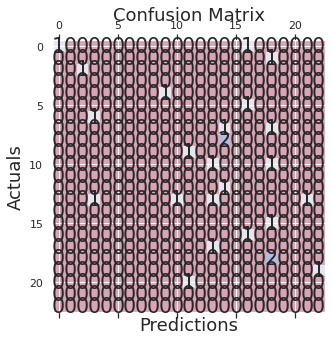

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  

SVC(kernel='linear', random_state=0)

In [ ]:
pred_SVM= classifier.predict(X_train)
accuracy_score(y_train, pred_SVM)

0.47572815533980584

In [ ]:
confusion_matrix(y_train, pred_SVM)

array([[0, 0, 0, ..., 0, 1, 1],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 0, 1, 2]])

In [ ]:
pred_SVM_test = classifier.predict(X_test)
t=accuracy_score(y_test, pred_SVM_test)

In [ ]:
print(classification_report(y_test, pred_SVM_test))

              precision    recall  f1-score   support

   Rp110,000       0.00      0.00      0.00         2
   Rp119,000       0.00      0.00      0.00         0
   Rp120,000       0.00      0.00      0.00         0
   Rp123,000       0.00      0.00      0.00         1
   Rp140,000       1.00      1.00      1.00         1
    Rp23,500       0.00      0.00      0.00         1
   Rp230,000       0.00      0.00      0.00         1
   Rp235,000       0.00      0.00      0.00         0
   Rp248,000       0.00      0.00      0.00         1
    Rp31,000       0.00      0.00      0.00         2
    Rp33,000       0.00      0.00      0.00         0
    Rp35,000       0.00      0.00      0.00         0
    Rp39,000       1.00      0.50      0.67         2
    Rp44,000       0.00      0.00      0.00         1
    Rp46,000       0.50      0.50      0.50         2
    Rp49,000       0.00      0.00      0.00         0
    Rp70,000       0.00      0.00      0.00         1
    Rp72,000       1.00    

In [ ]:
cma = confusion_matrix(y_test, pred_SVM_test)

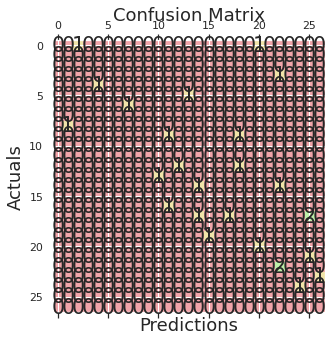

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Neural networks

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf2= MLPClassifier(solver='lbfgs', alpha=1e-5,
           hidden_layer_sizes=(5, 2), random_state=1)
clf2.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [ ]:
pred_NN= clf2.predict(X_train)
accuracy_score(y_train, pred_NN)

0.13592233009708737

In [ ]:
confusion_matrix(y_train, pred_SVM)

array([[0, 0, 0, ..., 0, 1, 1],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 0, 1, 2]])

In [ ]:
pred_NN_test = clf2.predict(X_test)
u=accuracy_score(y_test, pred_NN_test)

In [ ]:
print(classification_report(y_test, pred_NN_test))

              precision    recall  f1-score   support

   Rp105,000       0.00      0.00      0.00         0
   Rp110,000       0.00      0.00      0.00         2
   Rp123,000       0.00      0.00      0.00         1
   Rp140,000       0.50      1.00      0.67         1
   Rp149,000       0.00      0.00      0.00         0
    Rp23,500       0.00      0.00      0.00         1
   Rp230,000       0.00      0.00      0.00         1
   Rp248,000       0.00      0.00      0.00         1
    Rp31,000       0.00      0.00      0.00         2
    Rp39,000       0.00      0.00      0.00         2
    Rp44,000       0.00      0.00      0.00         1
    Rp46,000       0.00      0.00      0.00         2
    Rp49,000       0.00      0.00      0.00         0
    Rp70,000       0.20      1.00      0.33         1
    Rp72,000       0.00      0.00      0.00         4
    Rp75,000       0.00      0.00      0.00         0
    Rp76,000       0.00      0.00      0.00         1
    Rp83,000       0.50    

In [ ]:
cma = confusion_matrix(y_test, pred_NN_test)

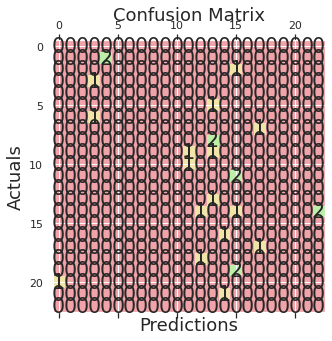

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Comparative predicting

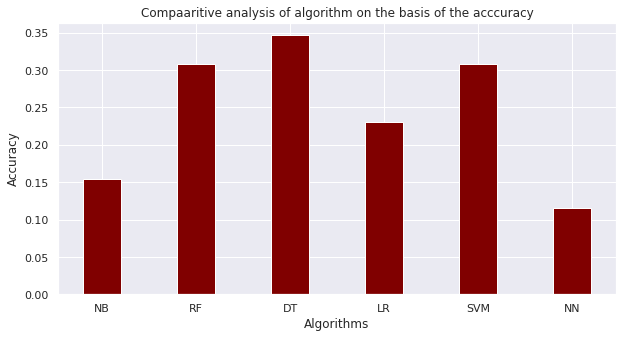

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'NB':p, 'RF':q, 'DT':r,'LR':s,'SVM':t,'NN':u}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(courses, values, color ='maroon',
		width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Compaaritive analysis of algorithm on the basis of the acccuracy")
plt.show()


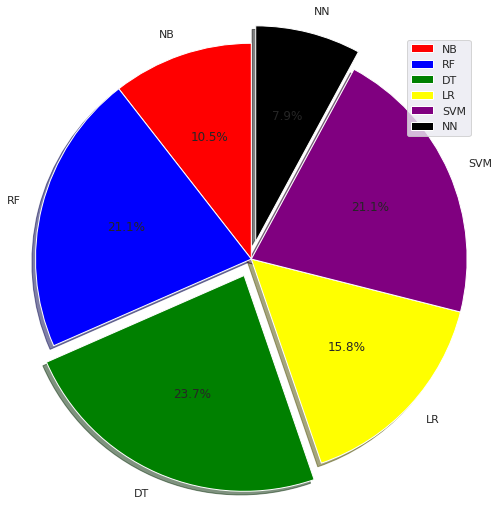

In [ ]:
activities = ['NB', 'RF', 'DT', 'LR','SVM','NN'] 
# portion covered by each label
slices = [p,q,r,s,t,u]
 
# color for each label
colors = ['red', 'blue', 'green','yellow','purple','black']
 
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors,
        startangle=90, shadow = True, explode = (0, 0, 0.1,0,0,0.1),
        radius = 1.2, autopct = '%1.1f%%')
 
# plotting legend
plt.legend()
 
# showing the plot
plt.show()

#Model saving

In [158]:
filename = 'naive_bayes.sav'
joblib.dump(model, filename)
filename1 = 'random_forest_Classifier.sav'
joblib.dump(clf_forest, filename1)
filename2 = 'decision_tree_classifier.sav'
joblib.dump(clf, filename2)
filename3 = 'logistic_regression.sav'
joblib.dump(clf1, filename3)
filename4 = 'support_vector_machine.sav'
joblib.dump(classifier, filename4)
filename5 = 'neural_networks.sav'
joblib.dump(clf2, filename5)

['neural_networks.sav']